<a href="https://colab.research.google.com/github/piotr-stefanski/fruit-and-vegetable-classification/blob/%C5%BC%C3%B3%C5%82ty-papie%C5%BC/Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **POBRANIE DANYCH Z DYSKU**

In [154]:
!pip install -U --no-cache-dir gdown==4.6.0 --pre

!rm -rf data && mkdir data

!gdown 1GiIW0-hT_i-XNsyfS1mvIbUIzsjvhyG4 -O data.zip

!unzip -q data.zip -d data

Downloading...
From: https://drive.google.com/uc?id=1GiIW0-hT_i-XNsyfS1mvIbUIzsjvhyG4
To: /content/data.zip
100% 12.7M/12.7M [00:00<00:00, 22.5MB/s]


# **TRENOWANIE MODELU**

In [155]:
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, BatchNormalization, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline

In [156]:
im_shape = (100,100)

TRAINING_DIR = '/content/data/datavegetables'
TEST_DIR = '/content/data/datavegetables'

seed = 10

BATCH_SIZE = 16
data_generator = ImageDataGenerator(rescale=1./255, validation_split=0.2)
val_data_generator = ImageDataGenerator(rescale=1./255, validation_split=0.2)

data_generator = ImageDataGenerator(
        validation_split=0.2,
        rotation_range=20,
        width_shift_range=0.2,
        height_shift_range=0.2,
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')

val_data_generator = ImageDataGenerator(rescale=1./255, validation_split=0.2)
train_generator = data_generator.flow_from_directory(TRAINING_DIR, target_size=im_shape, shuffle=True, seed=seed,
                                                     class_mode='categorical', batch_size=BATCH_SIZE, subset="training")
# Generator para parte validação
validation_generator = val_data_generator.flow_from_directory(TRAINING_DIR, target_size=im_shape, shuffle=False, seed=seed,
                                                     class_mode='categorical', batch_size=BATCH_SIZE, subset="validation")

# Generator para dataset de teste
test_generator = ImageDataGenerator(rescale=1./255)
test_generator = test_generator.flow_from_directory(TEST_DIR, target_size=im_shape, shuffle=False, seed=seed,
                                                     class_mode='categorical', batch_size=BATCH_SIZE)

nb_train_samples = train_generator.samples
nb_validation_samples = validation_generator.samples
nb_test_samples = test_generator.samples
classes = list(train_generator.class_indices.keys())
print('Classes: '+str(classes))
num_classes  = len(classes)

model = Sequential()
model.add(Conv2D(20, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(im_shape[0],im_shape[1],3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(40, kernel_size=(3,3), activation='relu'))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))
model.summary()

# Compila o modelo
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(),
              metrics=['accuracy'])

Found 2017 images belonging to 10 classes.
Found 501 images belonging to 10 classes.
Found 2518 images belonging to 10 classes.
Classes: ['apple', 'avocado', 'banana', 'kiwi', 'mandarin', 'orange', 'pear', 'pepper', 'potato', 'tomato']
Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_52 (Conv2D)          (None, 98, 98, 20)        560       
                                                                 
 max_pooling2d_32 (MaxPooli  (None, 49, 49, 20)        0         
 ng2D)                                                           
                                                                 
 conv2d_53 (Conv2D)          (None, 47, 47, 40)        7240      
                                                                 
 flatten_16 (Flatten)        (None, 88360)             0         
                                                                 
 dense_48 (Dens

### Uruchomienie procesu trenowania

In [157]:
epochs = 30

#Callback to save the best model
callbacks_list = [
    keras.callbacks.ModelCheckpoint(
        filepath='model.h5',
        monitor='val_loss', save_best_only=True, verbose=1),
    keras.callbacks.EarlyStopping(monitor='val_loss', patience=10,verbose=1)
]

#Training
history = model.fit(
        train_generator,
        steps_per_epoch=nb_train_samples // BATCH_SIZE,
        epochs=epochs,
        callbacks = callbacks_list,
        validation_data=validation_generator,
        verbose = 1,
        validation_steps=nb_validation_samples // BATCH_SIZE)

Epoch 1/30
126/126 [==============================] - ETA: 0s - loss: 1.2982 - accuracy: 0.5607
Epoch 1: val_loss improved from inf to 0.61707, saving model to model.h5
126/126 [==============================] - 9s 65ms/step - loss: 1.2982 - accuracy: 0.5607 - val_loss: 0.6171 - val_accuracy: 0.7198
Epoch 2/30
125/126 [============================>.] - ETA: 0s - loss: 0.4476 - accuracy: 0.8353
Epoch 2: val_loss improved from 0.61707 to 0.36721, saving model to model.h5
126/126 [==============================] - 7s 57ms/step - loss: 0.4461 - accuracy: 0.8356 - val_loss: 0.3672 - val_accuracy: 0.9093
Epoch 3/30
126/126 [==============================] - ETA: 0s - loss: 0.4115 - accuracy: 0.8591
Epoch 3: val_loss improved from 0.36721 to 0.08036, saving model to model.h5
126/126 [==============================] - 8s 63ms/step - loss: 0.4115 - accuracy: 0.8591 - val_loss: 0.0804 - val_accuracy: 0.9940
Epoch 4/30
126/126 [==============================] - ETA: 0s - loss: 0.1943 - accuracy: 

# **OCENA WYTRENOWANEGO MODELU**




### Wyświetlenie przebiegu procesu trenowania

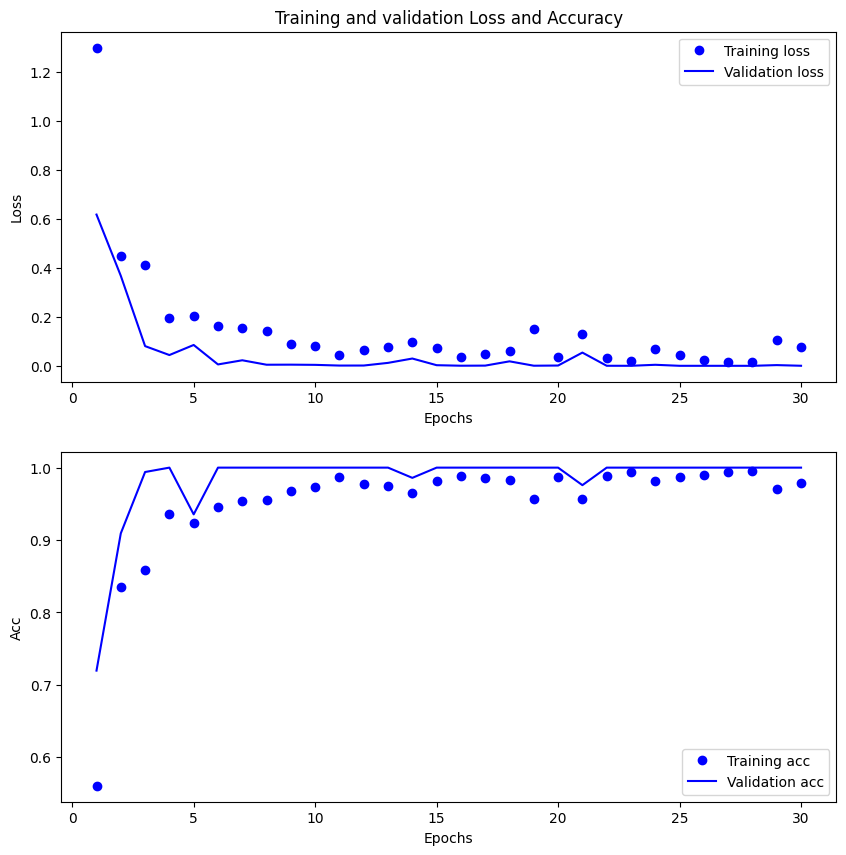

In [158]:
# Training curves
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs_x = range(1, len(loss_values) + 1)
plt.figure(figsize=(10,10))
plt.subplot(2,1,1)
plt.plot(epochs_x, loss_values, 'bo', label='Training loss')
plt.plot(epochs_x, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation Loss and Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.subplot(2,1,2)
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
plt.plot(epochs_x, acc_values, 'bo', label='Training acc')
plt.plot(epochs_x, val_acc_values, 'b', label='Validation acc')
#plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend()
plt.show()

Val loss: 4.276149411452934e-06
Val accuracy: 1.0
Test loss: 4.0804730815580115e-05
Test accuracy: 1.0
Classification Report
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00       300
     avocado       1.00      1.00      1.00       309
      banana       1.00      1.00      1.00       300
        kiwi       1.00      1.00      1.00       156
    mandarin       1.00      1.00      1.00       166
      orange       1.00      1.00      1.00       160
        pear       1.00      1.00      1.00       228
      pepper       1.00      1.00      1.00       306
      potato       1.00      1.00      1.00       296
      tomato       1.00      1.00      1.00       297

    accuracy                           1.00      2518
   macro avg       1.00      1.00      1.00      2518
weighted avg       1.00      1.00      1.00      2518



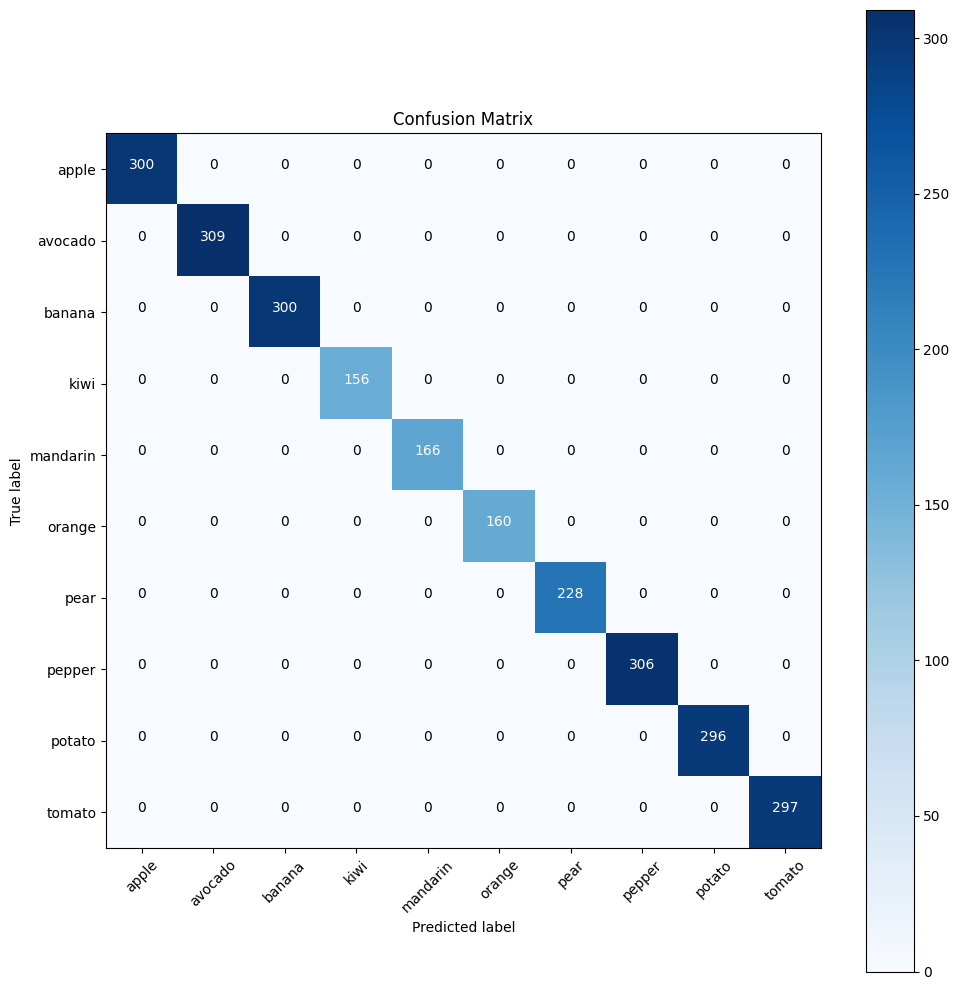

In [159]:
from tensorflow.keras.models import load_model

model = load_model('model.h5')

score = model.evaluate_generator(validation_generator)
print('Val loss:', score[0])
print('Val accuracy:', score[1])

score = model.evaluate_generator(test_generator)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

import itertools

#Plot the confusion matrix. Set Normalize = True/False
def plot_confusion_matrix(cm, classes, normalize=True, title='Confusion matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.figure(figsize=(10,10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = np.around(cm, decimals=2)
        cm[np.isnan(cm)] = 0.0
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

#On test dataset
Y_pred = model.predict_generator(test_generator)
y_pred = np.argmax(Y_pred, axis=1)
target_names = classes

#Confution Matrix
cm = confusion_matrix(test_generator.classes, y_pred)
plot_confusion_matrix(cm, target_names, normalize=False, title='Confusion Matrix')

#Classification Report
print('Classification Report')
print(classification_report(test_generator.classes, y_pred, target_names=target_names))

In [167]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode
import cv2
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.models import load_model


# Function to preprocess the image
def preprocess_image(img):
    img = cv2.resize(img, (100, 100))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)
    return img_array

# Function to capture images from the webcam in Colab
def take_photo(filename='photo.jpg', quality=0.8):
    display(Javascript('''
      async function takePhoto(quality) {
        const div = document.createElement('div');
        const capture = document.createElement('button');
        capture.textContent = 'Capture';
        div.appendChild(capture);

        const video = document.createElement('video');
        video.style.display = 'block';
        const stream = await navigator.mediaDevices.getUserMedia({ 'video': true });

        document.body.appendChild(div);
        div.appendChild(video);
        video.srcObject = stream;
        await video.play();

        // Resize the output to fit the video element.
        google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

        // Wait for the Capture to be clicked.
        await new Promise((resolve) => capture.onclick = resolve);

        const canvas = document.createElement('canvas');
        canvas.width = video.videoWidth;
        canvas.height = video.videoHeight;
        canvas.getContext('2d').drawImage(video, 0, 0);

        stream.getVideoTracks()[0].stop();
        div.remove();
        return canvas.toDataURL('image/jpeg', quality);
      }
    '''))
    data = eval_js('takePhoto({})'.format(quality))
    binary = b64decode(data.split(',')[1])
    with open(filename, 'wb') as f:
        f.write(binary)
    return filename

filename = take_photo('photo.jpg')
print('Saved to {}'.format(filename))
img = cv2.imread(filename)
processed_img = preprocess_image(img)
predictions = model.predict(processed_img)
predicted_class_index = np.argmax(predictions)
predicted_class = class_names[predicted_class_index]
print(f'The model predicts: {predicted_class}')

<IPython.core.display.Javascript object>

Saved to photo.jpg
1/1 [==============================] - 0s 18ms/step
The model predicts: avocado
